In [1]:
import seaborn as sns
import pandas as pd
import glob
import pickle as pkl
import torch
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
def parse_configs(path):
    variant = json.load(open(os.path.join(path, 'variant.json')))
    flat_config_dict = {}
    flat_config_dict = flatten_dict(variant, flat_config_dict)

    return flat_config_dict

def flatten_dict(config_dict, flat_config_dict, prefix=''):
    for key, val in config_dict.items():
        if type(config_dict[key]) == dict:
            flatten_dict(config_dict[key], flat_config_dict, prefix+'/'+key)
        else:
            flat_config_dict[(prefix + '/' + key).lstrip('/')] = val

    return flat_config_dict

def parse_progress(path, flat_config_dict):
    progress = pd.read_csv(os.path.join(path, 'progress.csv'))
    flat_config_dict = pd.concat([pd.DataFrame(flat_config_dict, index=[0])] * len(progress), ignore_index=True)

    progress = pd.concat([progress, flat_config_dict], axis=1)

    return progress

def parse_all_exps(data_dir):
    paths = glob.glob(os.path.join(data_dir, '*'))
    progress = pd.DataFrame()
    for path in paths:
        variant = parse_configs(path)
        progress = pd.concat([progress, parse_progress(path, variant)])
    # print(list(progress.columns))
    return progress

def load_params(path):
    params = torch.load(os.path.join(path))
    return params

# data_dir = './data/offline-data'
# step = 400
# paths = glob.glob(os.path.join(data_dir, '*', 'itr_{}.pkl'.format(step)))
# params = load_params(paths[0])

In [6]:
data_dir = './data/offline-data'
progress = parse_all_exps(data_dir)

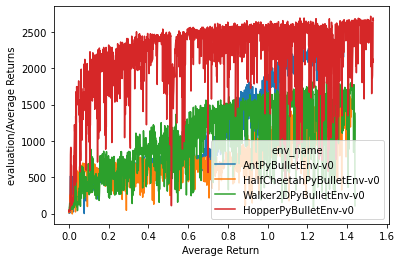

In [8]:
progress['Step'] = progress['Epoch'] * 1e3 / 1e6
env_names = progress['env_name'].unique()

for env_name in env_names:
    plt.figure()
    g = sns.lineplot(data = progress, x='Step', y='evaluation/Average Returns')
    g.set_xlabel('Steps (1e6)')
    g.set_xlabel('Average Return')
    plt.show()

# plt.figure()
# sns.lineplot(data = progress, x='Epoch', y='exploration/Average Returns', hue='env_name')